In [1]:
# Pablo Exposito Matilla al415550@uji.es

In [2]:
import numpy as np
import matplotlib.pylab as plt
import math

## 2. Bayes’ theorem

BT1. Complete the function gaussian(mean,std,x)
to return the univariate Gaussian function N (x;µ,σ)
with the given mean (mean) and standard deviation
(std), evaluated at the given point x.

In [3]:
def gaussian(mean, std, x):
    return np.exp(-(x - mean)**2/(2*std**2))/(np.sqrt(2*np.pi)*std)

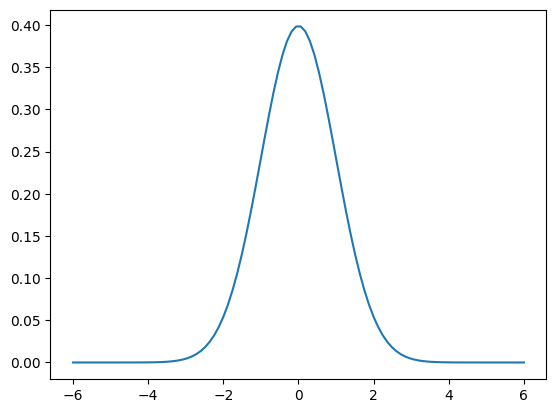

In [4]:
x = np.linspace(-6, 6, 100)
plt.plot(x, gaussian(0, 1, x))
plt.show()

BT2. Follow the steps of Problem 3.2 (page 85) of [MKG22]
to compute the prior, the likelihood and the posterior. Use the provided code and hints given in compute_
posterior(). For some of these computations, you
should use the function gaussian() we have defined
in Exercise  Two versions of the posterior should
be computed: numerically and analytically.


In [5]:
def plot_all(data_dict):
    s_values, Ls, x_obs, Ps, Psx_num, Psx = [data_dict[key] for key in
                                             ['s_values', 'Ls', 'x_obs', 'Ps', 'Psx_num', 'Psx']]
    fig = plt.figure()
    plt.xlabel(r'stimulus, $s$')
    ax = fig.axes[0]

    # if s_values is not None:
    #    ax.set_xticks(list(np.arange(s_values[0], s_values[-1] + 1, 5)))
    if x_obs is not None:
        plt.axvline(x_obs, color='orange', ls='--', label=r'$x_{obs}$')

    if Ls is not None:
        plt.plot(s_values, Ls, label=r'${\cal L}(s;x)=P(x|s)$', c='red', ls='-.', lw=2)
    if Ps is not None:
        plt.plot(s_values, Ps, label=r'$P(s)$', c='blue', ls='-', lw=2)
    if Psx_num is not None:
        plt.plot(s_values, Psx_num, label=r'$P(s|x)$, numerically', c='gray', ls='-.', lw=3, alpha=0.5)
    if Psx is not None:
        plt.plot(s_values, Psx, label=r'$P(s|x)$, analytically', c='green', ls='--', lw=3)
    plt.legend(loc='upper left')

    plt.show(block=True)


def compute_posterior(mean_s, std_s, x_obs, std_x, s):
    s_min, s_max, s_step = s 

    # a) Hypothesized stimulus values
    s_values = np.linspace(s_min, s_max, num=int((s_max - s_min) / s_step) + 1, endpoint=True)

    # b1) Prior, P(s), Eq. (3.1), Fig. 3.4(A)
    Ps = gaussian(mean_s, std_s, s_values)

    # b2) Likelihood, L(s;x) = P(x|s). Eqs. (3.6)-(3.7), Fig. 3.4 (B) [erratum: s_hyp and x_obs should be swapped]
    Ls = gaussian(x_obs, std_x, s_values)

    # c) Posterior, P(s|x_obs), numerically
    Psx_num = Ls * Ps

    # d) Normalization
    # Your code # prob. mass function, normalization, Box 3.6
    Psx_num = Psx_num / (np.sum(Psx_num) * s_step)
    
    # e) prob. density function
    # Extra: Posterior, P(s|x_obs), now, analytically (Box 3.7, eq. 3.18-3.20 or 3.21-3.25)
    mean_p = (mean_s/std_s**2 + x_obs/std_x**2) / (1/std_s**2 + 1/std_x**2)
    var_p = 1 / (1/std_s**2 + 1/std_x**2)
    std_p = math.sqrt(var_p)

    Psx = gaussian(mean_p, std_p, s_values)

    return {'s_values': s_values, 'x_obs': x_obs,
            'Ls': Ls, 'Ps': Ps,
            'Psx_num': Psx_num, 'Psx': Psx}





> Prior gaussian median 20 and standard deviation 4                       
likelihood gaussian standard deviation 5 and xobs 30                     
Given:                                    
  Stimulus: p(s)\~N(20,4)         
  Measurement: p(x|s)~N(x,5)             
  Observed: x = 30



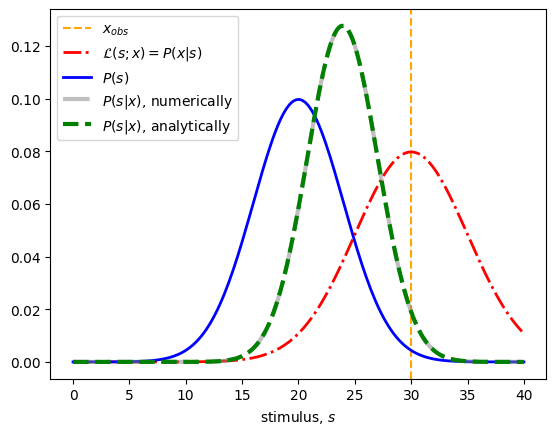

The MAP estimate is: 24.0


In [6]:
if __name__ == "__main__":

    # Computing prior, likelihood and posterior using 1D Gaussians
    data_dict = compute_posterior(20, 4, 30, 5, [0, 40, 0.2])

    # Plot these data
    plot_all(data_dict)

    map_index = np.argmax(data_dict["Psx_num"])
    map_value = data_dict["s_values"][map_index]
    print("The MAP estimate is:", map_value)  

BT3. Change some values in the problem at a time and make
sure the result make sense. You can vary the Gaussian
parameters, the observation point, the prior.




> prior gaussian median 3 and standard deviation 1.5                      
likelihood gaussian standard deviation 1 and xobs 2                     
Given:                                    
  Stimulus: p(s)\~N(-2,1)         
  Measurement: p(x|s)~N(x,1)             
  Observed: x = 2


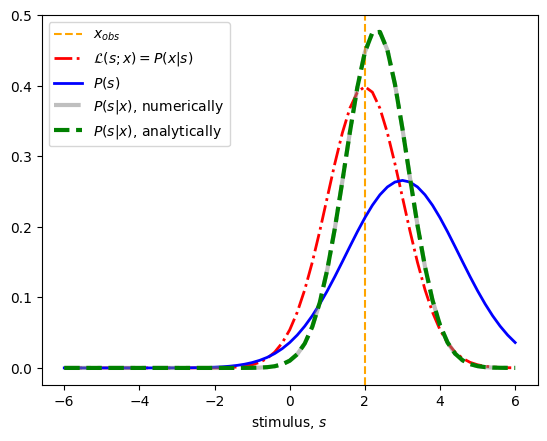

In [7]:
if __name__ == "__main__":

    # Computing prior, likelihood and posterior using 1D Gaussians
    data_dict = compute_posterior(3, 1.5, 2, 1, [-6, 6, 0.2])

    # Plot these data
    plot_all(data_dict)

BT4. In this context, what would the predicted hypothesis be
using a MAP criterion?



> En el contexto de inferencia bayesiana, el criterio MAP (Maximum a Posteriori) se utiliza para seleccionar la hipótesis más probable dada la evidencia observada. Es decir, se elige la hipótesis que maximiza la probabilidad posterior.




In [8]:
map_index = np.argmax(data_dict["Psx_num"])
map_value = data_dict["s_values"][map_index]
print("The MAP estimate is:", map_value)  

The MAP estimate is: 2.4000000000000004
